### Imports and functions

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# from google.cloud import storage

# client = storage.Client()
# for blob in client.list_blobs('climateai_data_repository', prefix='tmp/internal_variability'):
#   print(str(blob))

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy

In [5]:
def sensitivity_test(parameter,region,args):
    values = args[parameter]
    datasets = []
    for i in values:
        args[parameter] = i
        internal = region.extreme_internal_variability(**args)
        datasets.append(internal)
    dataset = xr.concat(datasets, dim=values)
    dataset['MTratio'] = dataset.model_le/dataset.total_le
        
    return dataset

In [6]:
def sensitivity_allregions(parameter, args):
    regions = [USeast,USwest,iceland,europe,australia,tropics]
    dss = []
    for r in regions:
        tmp_args = deepcopy(args)
        ds = sensitivity_test(parameter=parameter,region=r,args=tmp_args)
        ds = ds.expand_dims('region')
        dss.append(ds)
    regions = ['USeast','USwest','iceland','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    
    return final_dataset

In [7]:
def extreme_internal_allregions(args):
    regions = [USeast,USwest,iceland,europe,australia,tropics]
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions = ['USeast','USwest','iceland','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    return final_dataset

### Load Datasets

In [97]:
# # settings 
# #for temp
variable = 'tas'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 

# for precip - still having issues getting EC-Earth data 
# variable = 'pr'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [98]:
USeast = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_41.3_287.5.zarr


In [99]:
USwest = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=37.7, lon=-122.4,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_37.7_237.6.zarr


In [100]:
iceland = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=65, lon=-19,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_65_341.zarr


In [101]:
europe = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=51,lon=10.5,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_51_10.5.zarr


In [102]:
australia = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=-25.2,lon=133.7,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_-25.2_133.7.zarr


In [103]:
tropics = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=3.9,lon=-53.1,
                                 bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tas_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tas_3.9_306.9.zarr


### sensitivity testing
using model:internal ratio for testing the various parameters. When ratio > 1, model uncertainty dominates. When ratio < 1, internal variability dominates. 

### Return periods 

In [104]:
test_return = sensitivity_allregions(parameter='return_period',
                                     args = {'return_period':[5,10,15,20,25,30, 50, 75, 100, 200],
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':slice('1995','2014'),
                                             'postprocess':True
                                               })

In [105]:
test_return

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, concat_dim: 10, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           (concat_dim) float64 0.9995 0.9997 0.9998 ... 1.0 1.0 1.0
  * concat_dim         (concat_dim) int64 5 10 15 20 25 30 50 75 100 200
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/15)
    tas_occurance      (region, concat_dim, model, member, time) float64 nan ...
    model_le           (region, concat_dim, time) float64 nan nan ... nan nan
    internal_le        (region, concat_dim, time) float64 nan nan ... nan nan
    total_le           (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_le    (region, concat_dim, time) float64 nan nan ... nan nan
    internal_le_frac   (region, concat_dim, time) float64 nan nan ... nan nan
    ...                 ...
    model_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    total_fit          (region, concat_dim, time) float64 nan nan ... nan nan
    internal_fit_frac  (region, concat_dim, time) float64 nan nan ... nan nan
    model_fit_frac     (region, concat_dim, time) float64 nan nan ... nan nan
    total_direct_fit   (region, concat_dim, time) float64 nan nan ... nan nan
    MTratio            (region, concat_dim, time) float64 nan nan ... nan nan

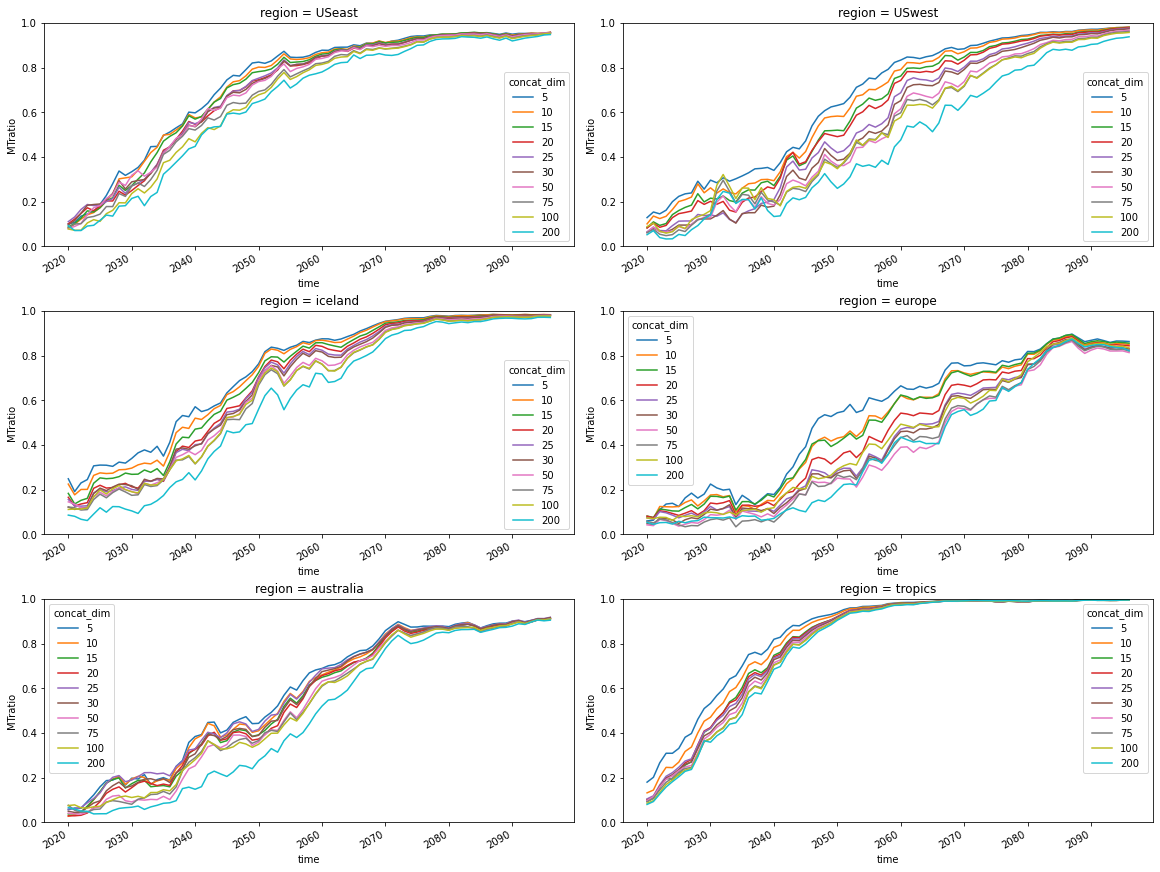

In [106]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_return.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe);
    axe.set_ylim(0, 1)

For temp: greater internal variability for larger return periods. US west and Europe have largest spreads. Convergence towards the end of the century for all return periods when model uncertainty dominates. This point is reached much earlier for the tropics. 

### Hist_slice

In [118]:
test_histslice = sensitivity_allregions(parameter='hist_slice',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':10,
                                                'hist_slice':[slice('1920','1940'),slice('1940','1960'),slice('1960','1980'),
                                                              slice('1990','2010'),slice('1995','2014'),slice('1930','1950'),
                                                              slice(None, None), slice('1990', None)],
                                               'postprocess':False}
                                       )

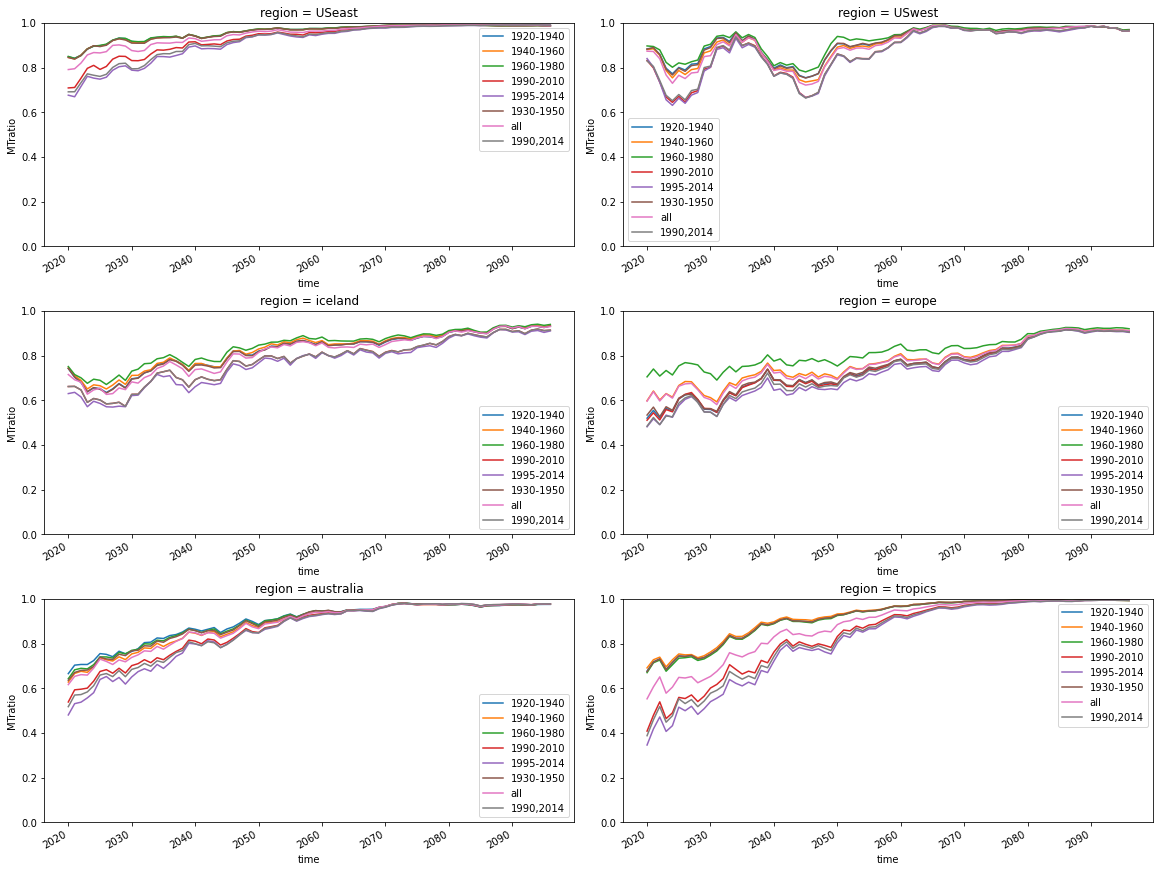

In [119]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_histslice.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe,add_legend=False);
    labels = ['1920-1940','1940-1960','1960-1980','1990-2010','1995-2014','1930-1950','all','1990,2014']
    axe.legend(labels)
    axe.set_ylim(0, 1)

### coarsen

In [109]:
test_coarsen = sensitivity_allregions(parameter='coarsen',
                                    args = {'return_period':10,
                                            'coarsen':[1,2,3,4,5,6,7],
                                            'conseq_days':3,
                                            'rolling_average':10,
                                            'hist_slice':slice('1995','2014'),
                                            'postprocess':True
                                           })

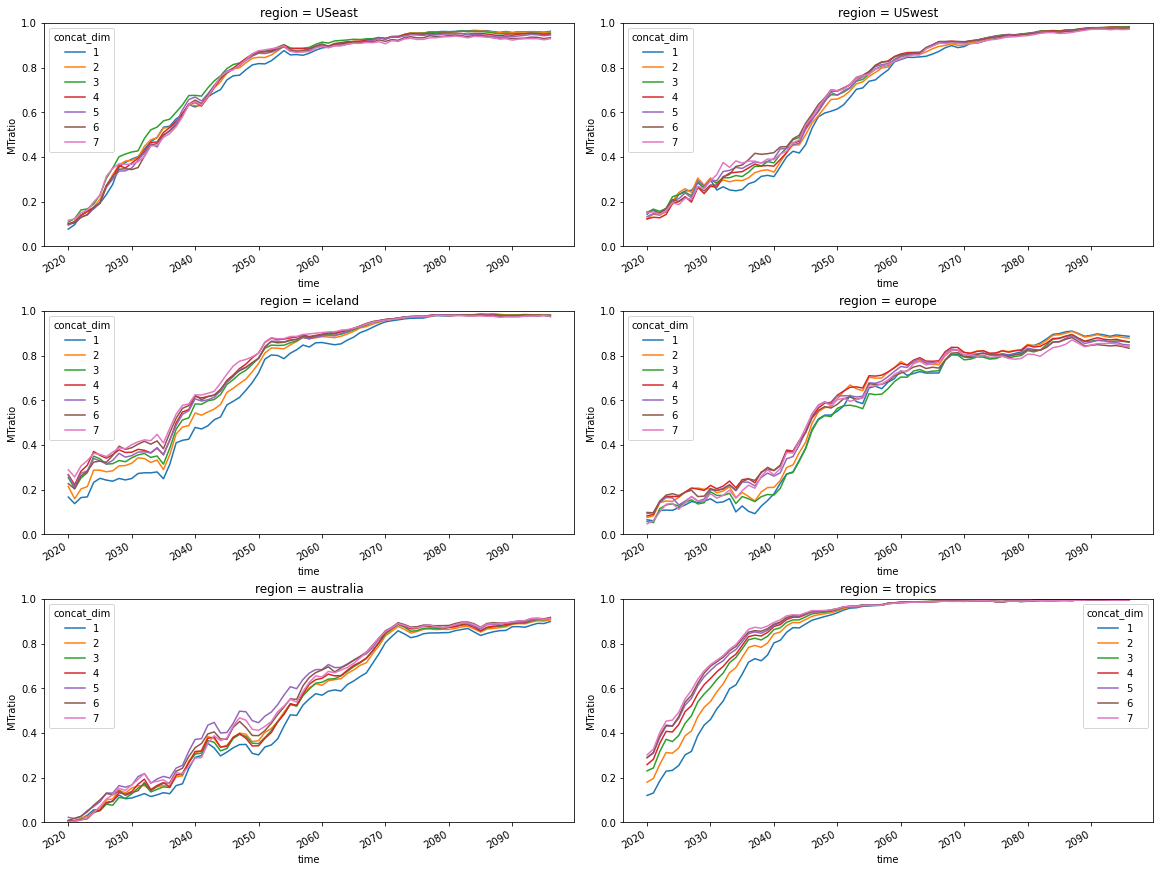

In [110]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_coarsen.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe);
    axe.set_ylim(0, 1)

### Consecutive days 

In [116]:
test_conseq = sensitivity_allregions(parameter='conseq_days',
                       args= {'return_period':10,
                              'coarsen':1,
                              'conseq_days':[1,2,3,4,5,6],
                              'rolling_average':10,
                              'hist_slice':slice('1995','2014'),
                              'postprocess':True
                             }
                      )

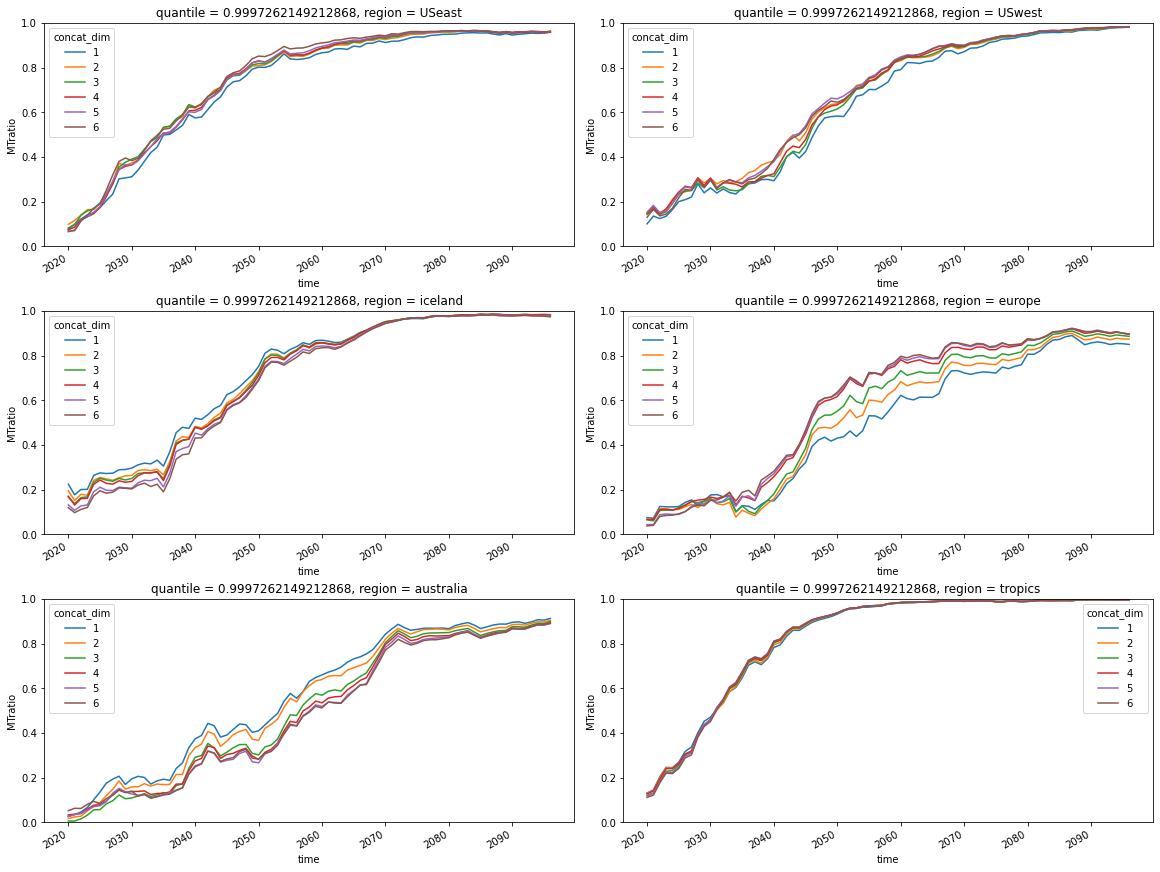

In [117]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_conseq.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe);
    axe.set_ylim(0, 1)

### rolling average

In [113]:
test_rolling = sensitivity_allregions(parameter='rolling_average',
                                        args = {'return_period':10,
                                                'coarsen':1,
                                                'conseq_days':1,
                                                'rolling_average':[1,5,10,15,20,25],
                                                'hist_slice':slice('1995','2014'),
                                                'postprocess':True
                                               }
                                     )

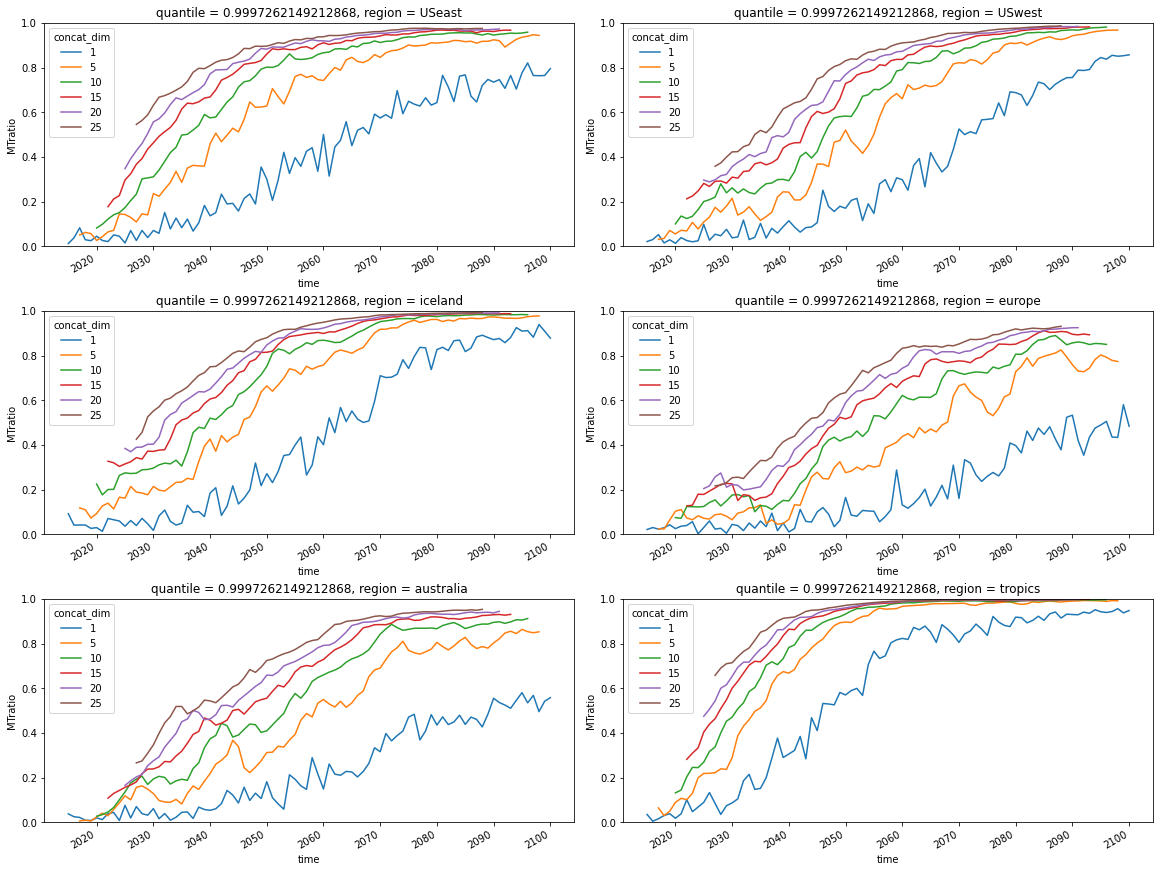

In [114]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    test_rolling.sel(region=r).MTratio.plot(hue='concat_dim',ax=axe);
    axe.set_ylim(0, 1)

### Look at total uncertainty (figure for company) 

In [115]:
pp = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':True
                                    }
                           )

In [63]:
raw = extreme_internal_allregions(args = {'return_period':10,
                                    'coarsen':1,
                                    'conseq_days':1,
                                    'rolling_average':10,
                                    'hist_slice':slice('1995','2014'),
                                    'postprocess':False
                                    }
                           )

In [64]:
pp

<xarray.Dataset>
Dimensions:            (time: 86, member: 50, model: 4, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    member_id          (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR'
    quantile           float64 0.9997
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/14)
    pr_occurance       (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le        (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le_frac   (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_fit       (region) float64 8.053e-08 4.414e-08 ... 6.231e-08
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

In [65]:
raw

<xarray.Dataset>
Dimensions:            (time: 86, member: 50, model: 4, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
    member_id          (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR'
    quantile           float64 0.9997
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/14)
    pr_occurance       (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le        (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le_frac   (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_fit       (region) float64 6.868e-08 5.23e-08 ... 1.402e-08
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

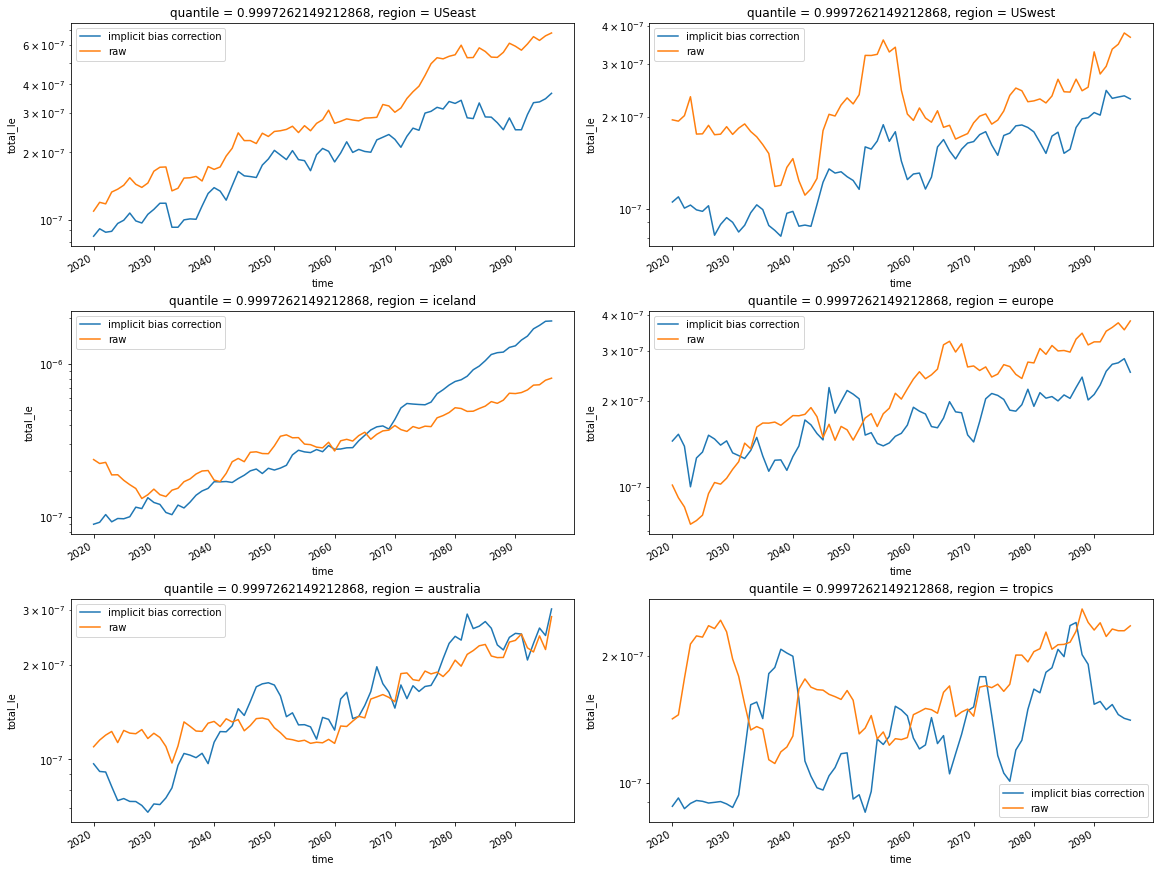

In [66]:
fig,ax = plt.subplots(nrows=3,ncols=2,constrained_layout=True,figsize=(16,12))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
for axe,r in zip(axes,regions):
    pp.sel(region=r).total_le.plot(ax=axe,label='implicit bias correction');
    raw.sel(region=r).total_le.plot(ax=axe,label='raw');
    axe.legend()
    axe.set_yscale('log')

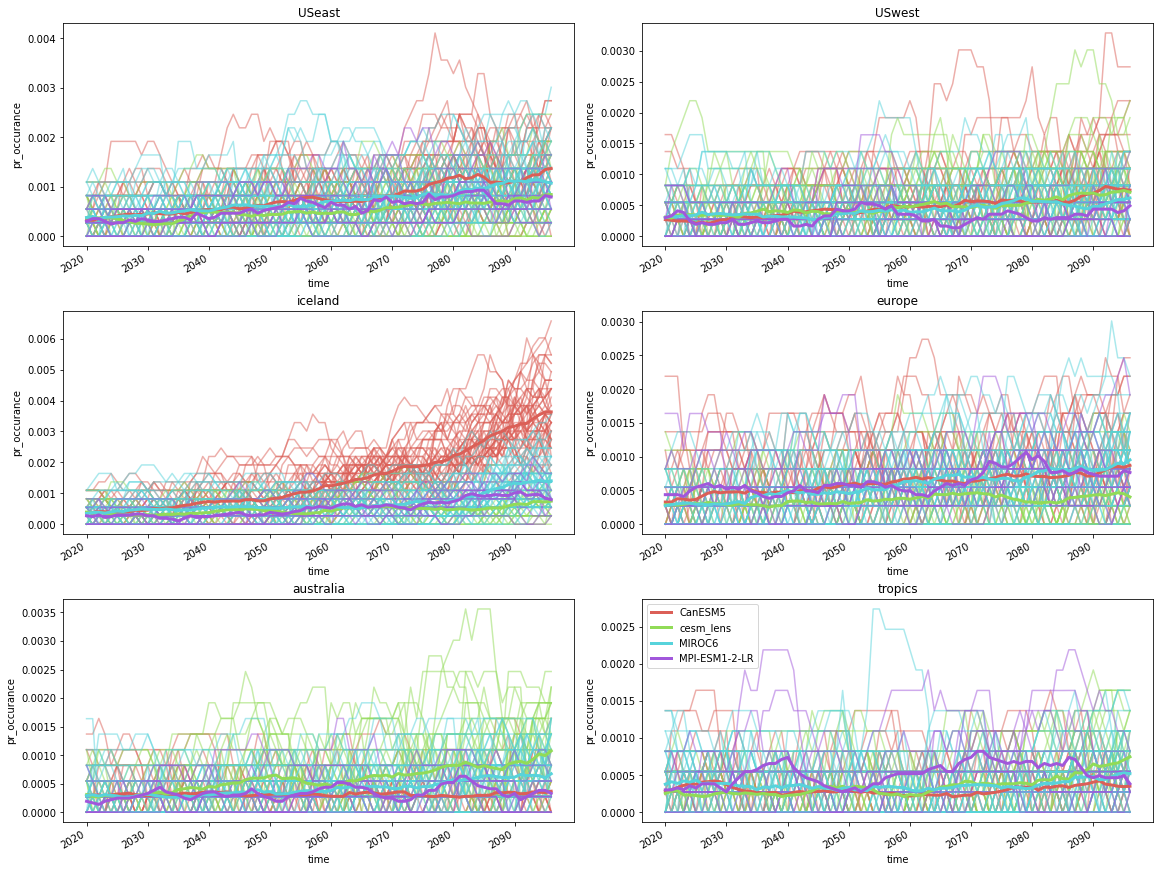

In [67]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(pp[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
title = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r,t in zip(axes,regions,title):
    for i, model in enumerate(pp[variable+'_occurance'].model):
        m = pp.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(t)
plt.legend()

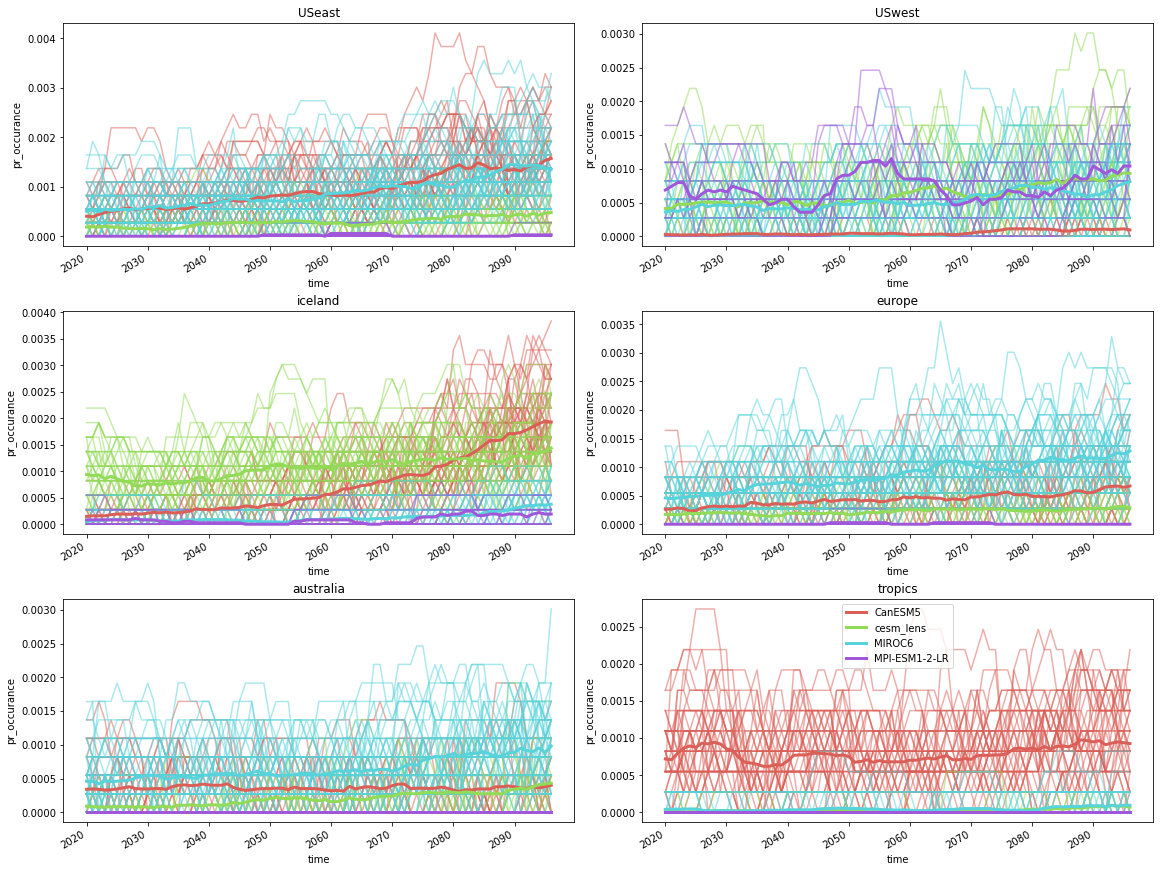

In [68]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(raw[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']
title = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r,t in zip(axes,regions,title):
    for i, model in enumerate(raw[variable+'_occurance'].model):
        m = raw.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(t)
plt.legend()

### Internal Variability with yearly max temp

In [120]:
regions = [USeast,USwest,iceland,europe,australia,tropics]
dss = []
for r in regions:
    # empty dataset
    dataset = xr.Dataset()
    #reference data (max temp/pr)
    ref = r.hist[variable].sel(time=slice('1995','2014'))
    ref = ref.resample(time='AS').max('time').mean(dim=('time','member'))
    # prep future max data
    data = r.future[variable].resample(time='AS').max(dim='time').rolling(time=10,center=True).mean()
    if variable == 'tas' or 'tasmax' or 'tasmin':
        data = data - ref
    elif variable == 'pr':
        data = (((data-ref)/data)*100)
    # add variables to dataset
    dataset[variable] = data
    dataset['ref'] = ref
    dataset[variable] = dataset[variable].T
    
            # Internal var via LE method 
    dataset['model_le'] = USeast.compute_modelLE(data=dataset[variable])
    dataset['internal_mean_le'] = USeast.compute_internalLE(data=dataset[variable])
#     dataset['internal_var_le'] = USeast.compute_internalLE(data=dataset[variable])[1]
    dataset['total_le'] = USeast.compute_total_uncertainty(internal=dataset['internal_mean_le'],model=dataset['model_le'])
    dataset['total_direct_le'] = USeast.compute_total_direct(data=dataset[variable])
    dataset['internal_le_frac'],dataset['model_le_frac']=USeast.compute_percent_contribution(internal=dataset['internal_mean_le'],
                                                                                                   model=dataset['model_le'],
                                                                                                   total = dataset['total_le'])
            # Internal var via FIT method
    dataset['fit'] = USeast.get_fit(data=dataset[variable])
    dataset['internal_mean_fit'] = USeast.compute_internalFIT(data=dataset[variable].isel(member=0),
                                                               fit = dataset['fit'])
#     dataset['internal_var_fit'] = USeast.compute_internalFIT(data=dataset[variable].isel(member=0),
#                                                                fit = dataset['fit'])[1]
    dataset['model_fit'] = USeast.compute_modelFIT(fit=dataset['fit'])
    dataset['total_fit'] = USeast.compute_total_uncertainty(internal=dataset['internal_mean_fit'],model=dataset['model_fit'])
    dataset['internal_fit_frac'],dataset['model_fit_frac']= USeast.compute_percent_contribution(internal=dataset['internal_mean_fit'],
                                               model=dataset['model_fit'],
                                               total = dataset['total_fit'])
    dataset['total_direct_fit'] = USeast.compute_totaldirect_fit(data=dataset[variable].isel(member=0))
    dataset = dataset.expand_dims('region')
    dss.append(dataset)
# merge datasets to have region as dimension 
regions = ['USeast','USwest','iceland','europe','australia','tropics']
internal_max = xr.concat(dss,dim='region')
internal_max = internal_max.assign_coords({'region':regions})


In [121]:
internal_max

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/15)
    tas                (region, time, member, model) float64 nan nan ... nan nan
    ref                (region, model) float32 29.33 27.1 28.29 ... 29.82 30.71
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_mean_le   (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_mean_fit  (region) float64 0.05927 0.1002 ... 0.1177 0.01808
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

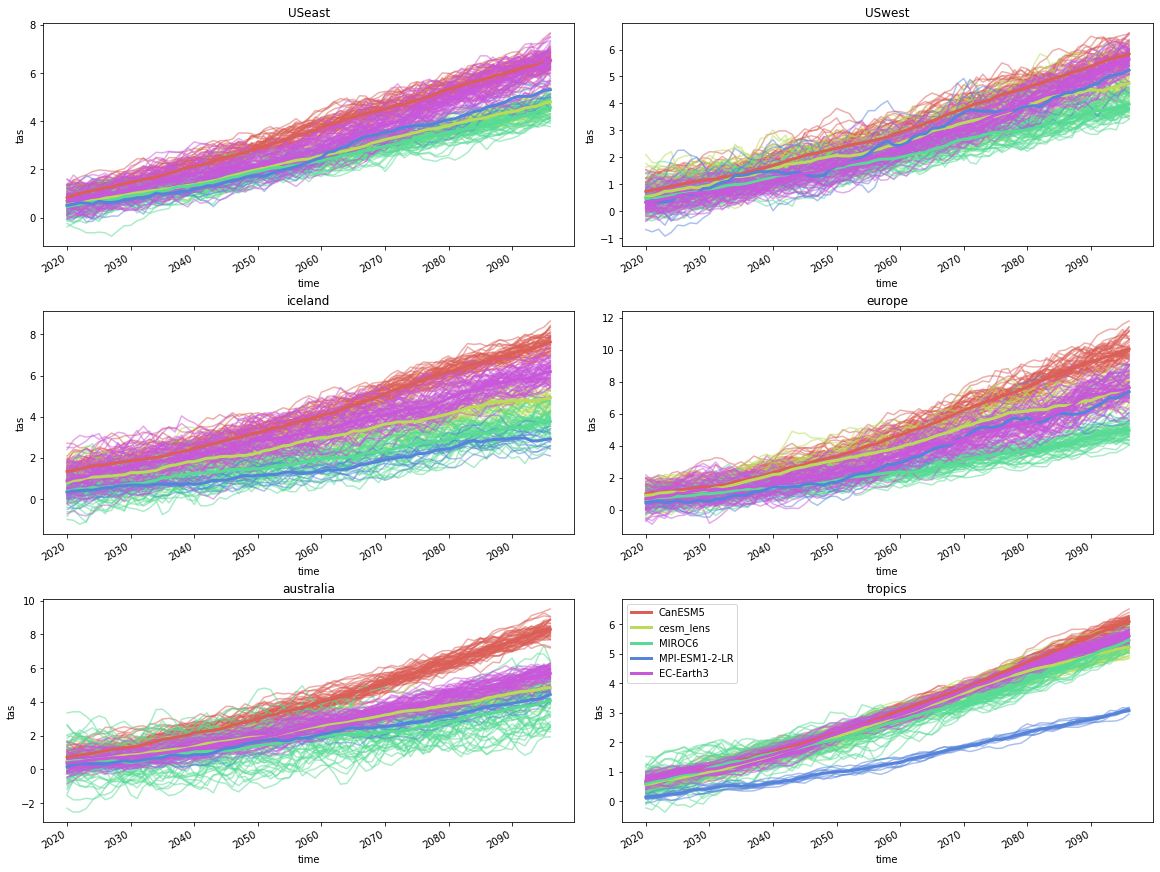

In [122]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal_max[variable].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_max[variable].model):
        m = internal_max.sel(region=r)[variable].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

Text(0, 0.5, 'Model and Total Uncertainty (Deg C)')

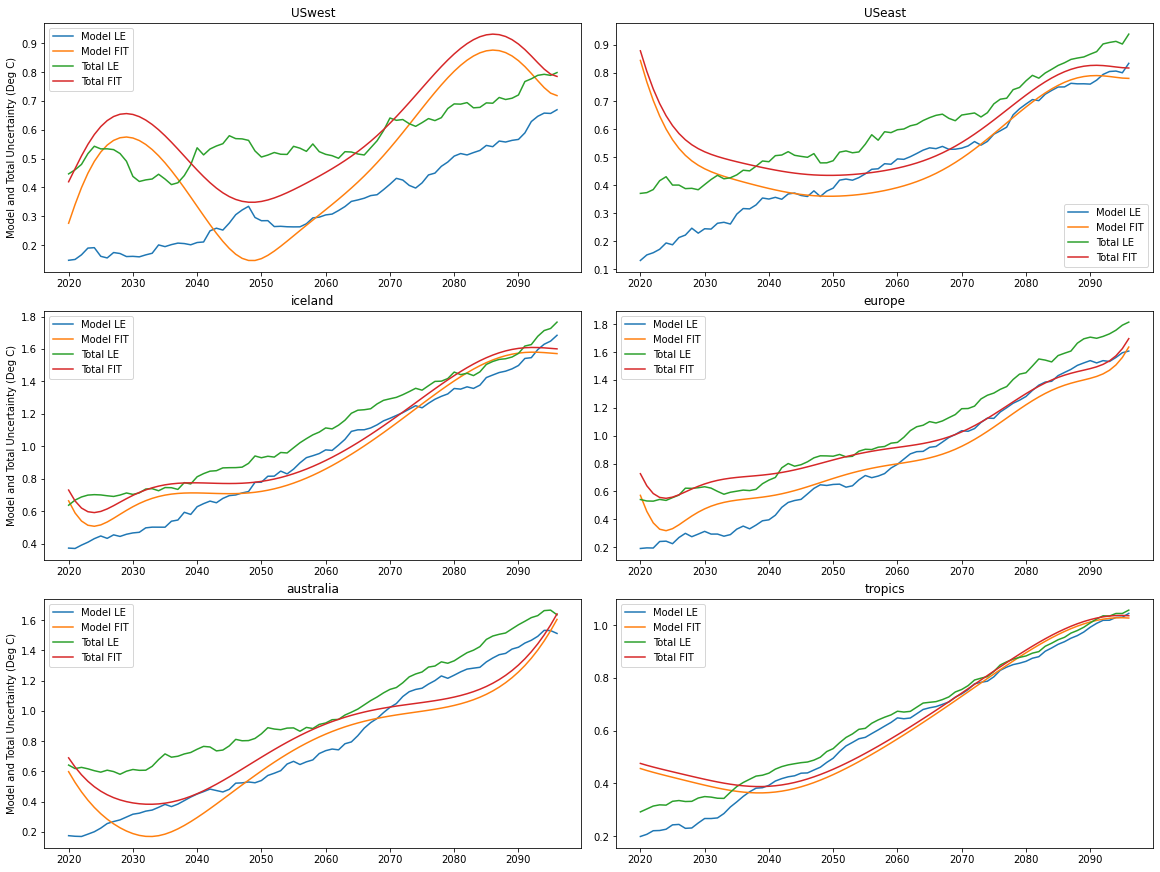

In [123]:
# plot model uncertainty and total uncertainty 
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).model_le),label='Model LE')
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).model_fit),label='Model FIT')
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_le),label='Total LE')
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_fit),label='Total FIT')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Model and Total Uncertainty (Deg C)')
ax[1,0].set_ylabel('Model and Total Uncertainty (Deg C)')
ax[2,0].set_ylabel('Model and Total Uncertainty (Deg C)')

Text(0, 0.5, 'Total Uncertainty')

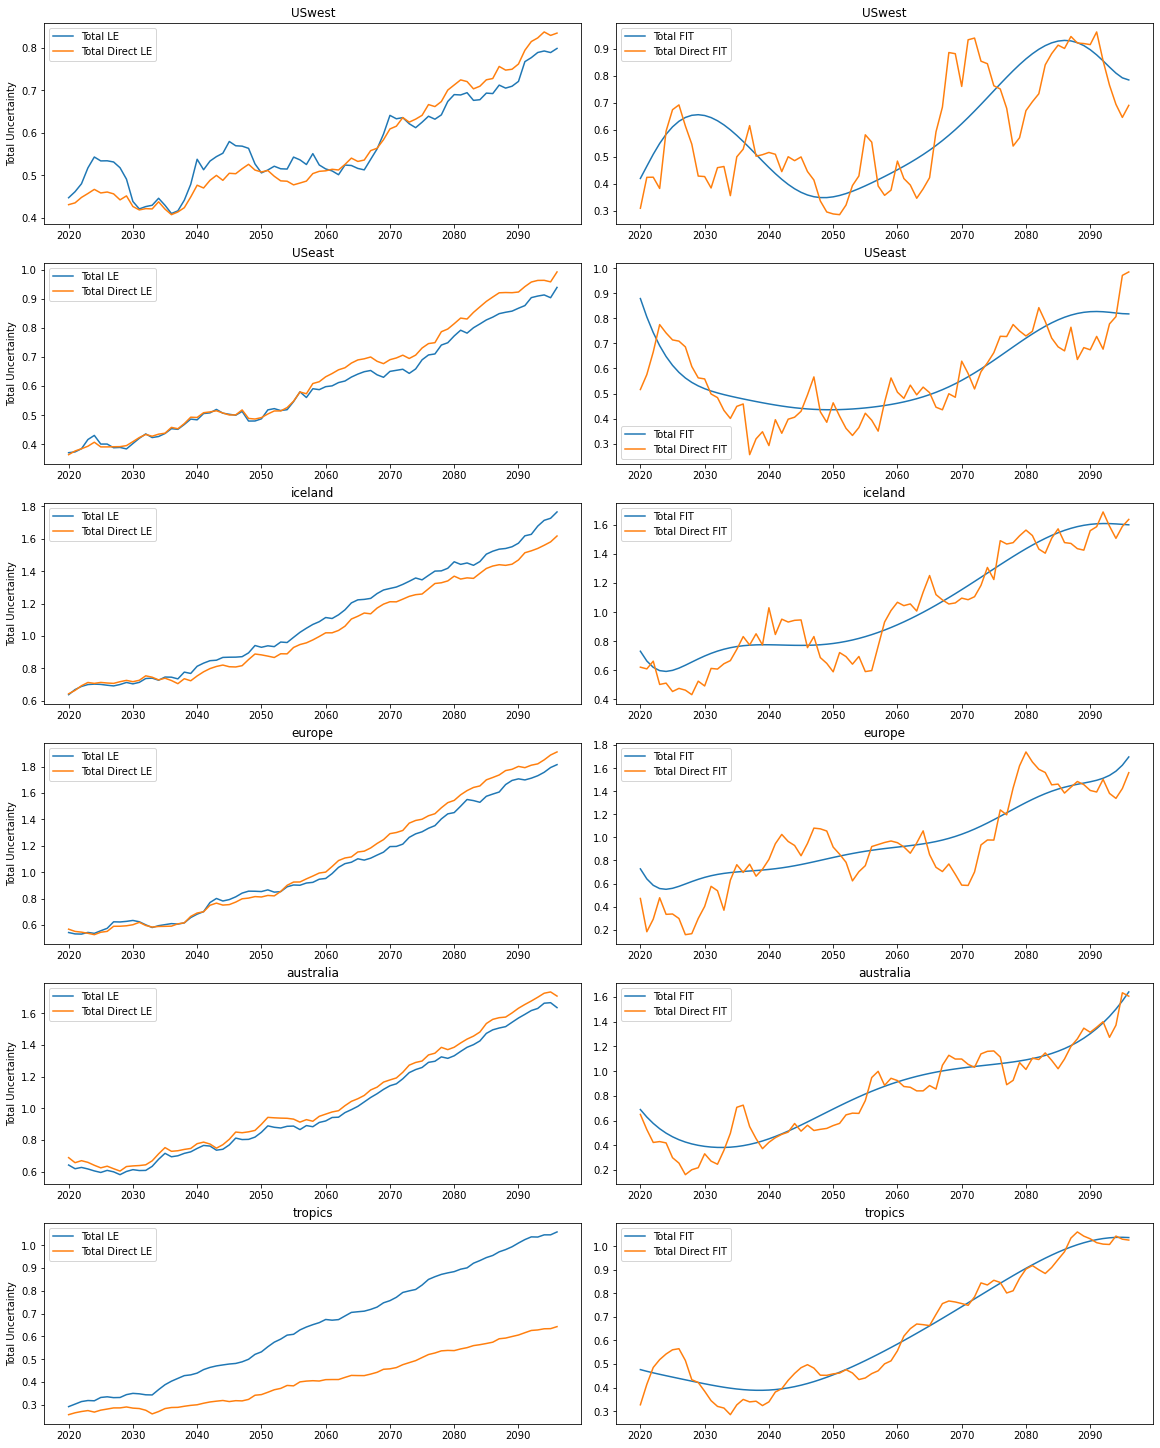

In [124]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_le),label='Total LE')
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_direct_le),label='Total Direct LE')
    axis.legend()
    axis.set_title(region)
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_fit),label='Total FIT')
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).total_direct_fit),label='Total Direct FIT')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Total Uncertainty')
ax[1,0].set_ylabel('Total Uncertainty')
ax[2,0].set_ylabel('Total Uncertainty')
ax[3,0].set_ylabel('Total Uncertainty')
ax[4,0].set_ylabel('Total Uncertainty')
ax[5,0].set_ylabel('Total Uncertainty')

Text(0, 0.5, 'Internal Variability')

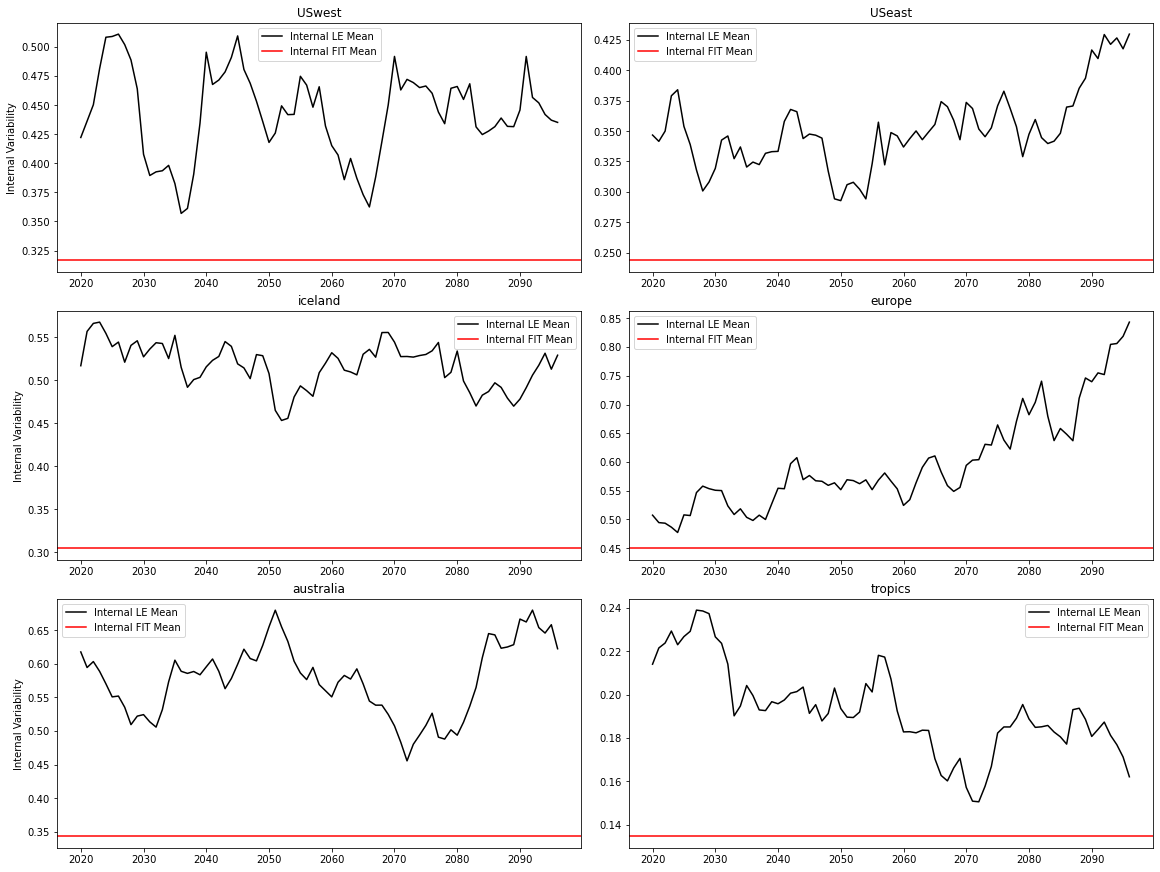

In [125]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal_max.sel(region=region).time,np.sqrt(internal_max.sel(region=region).internal_mean_le),
              label='Internal LE Mean',color='k')
    axis.axhline(np.sqrt(internal_max.sel(region=region).internal_mean_fit),label='Internal FIT Mean',color='r')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Internal Variability')
ax[1,0].set_ylabel('Internal Variability')
ax[2,0].set_ylabel('Internal Variability')

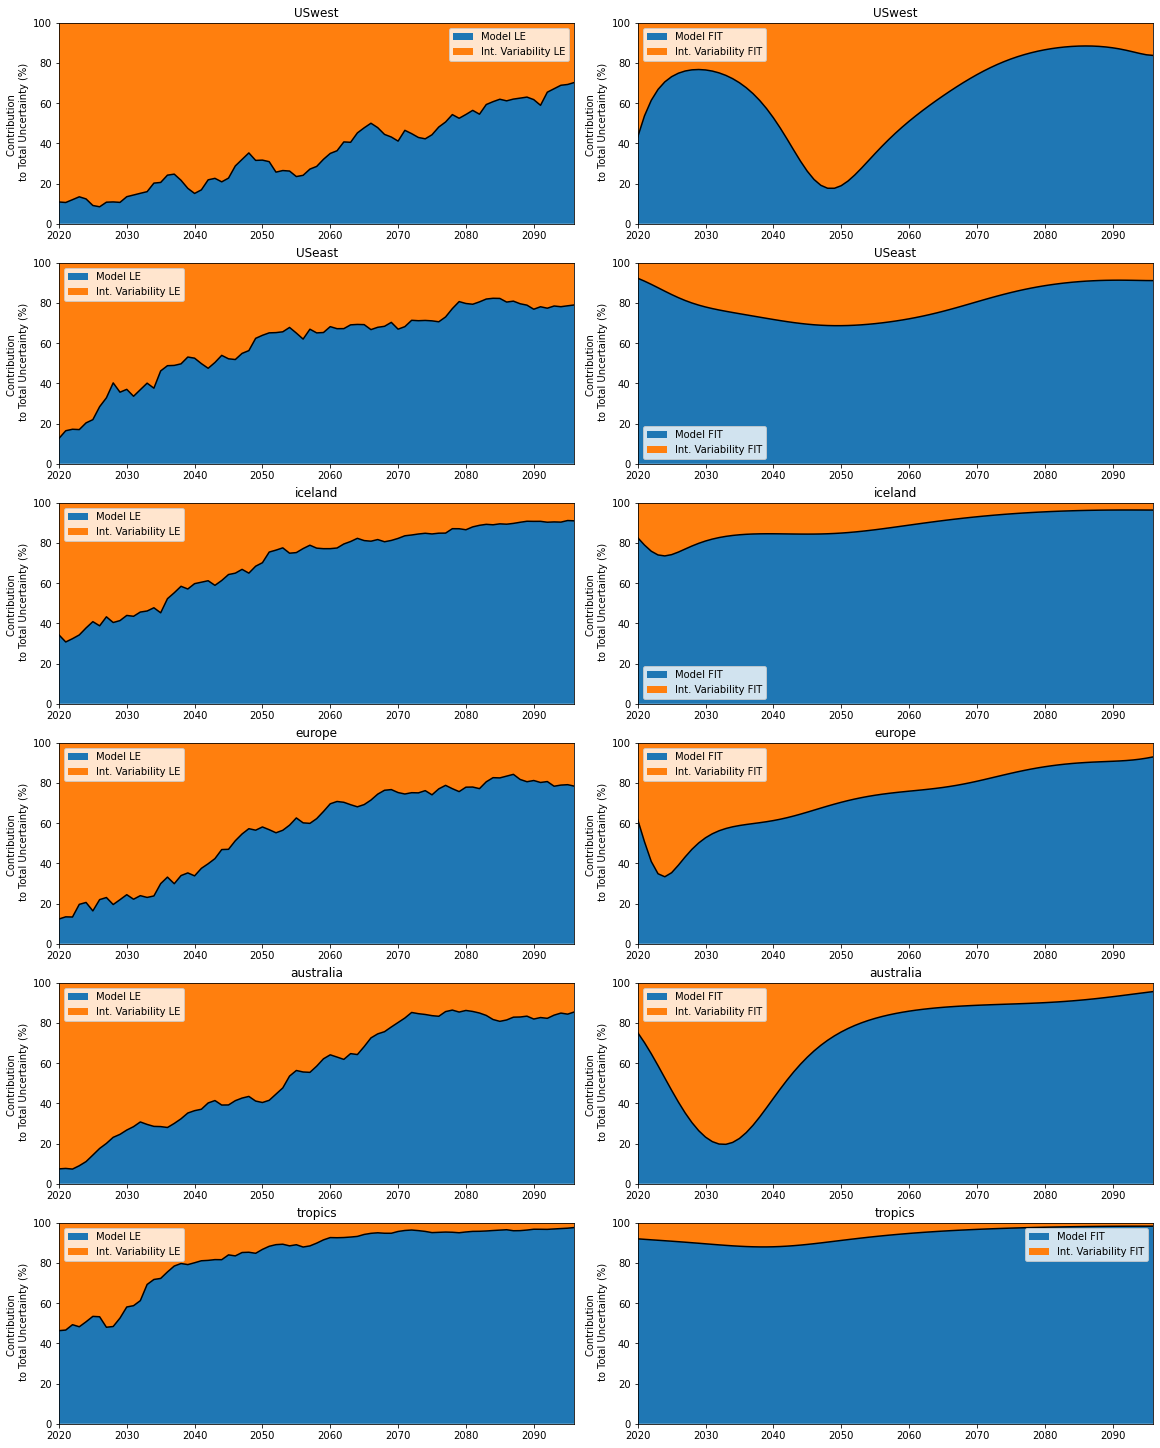

In [126]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

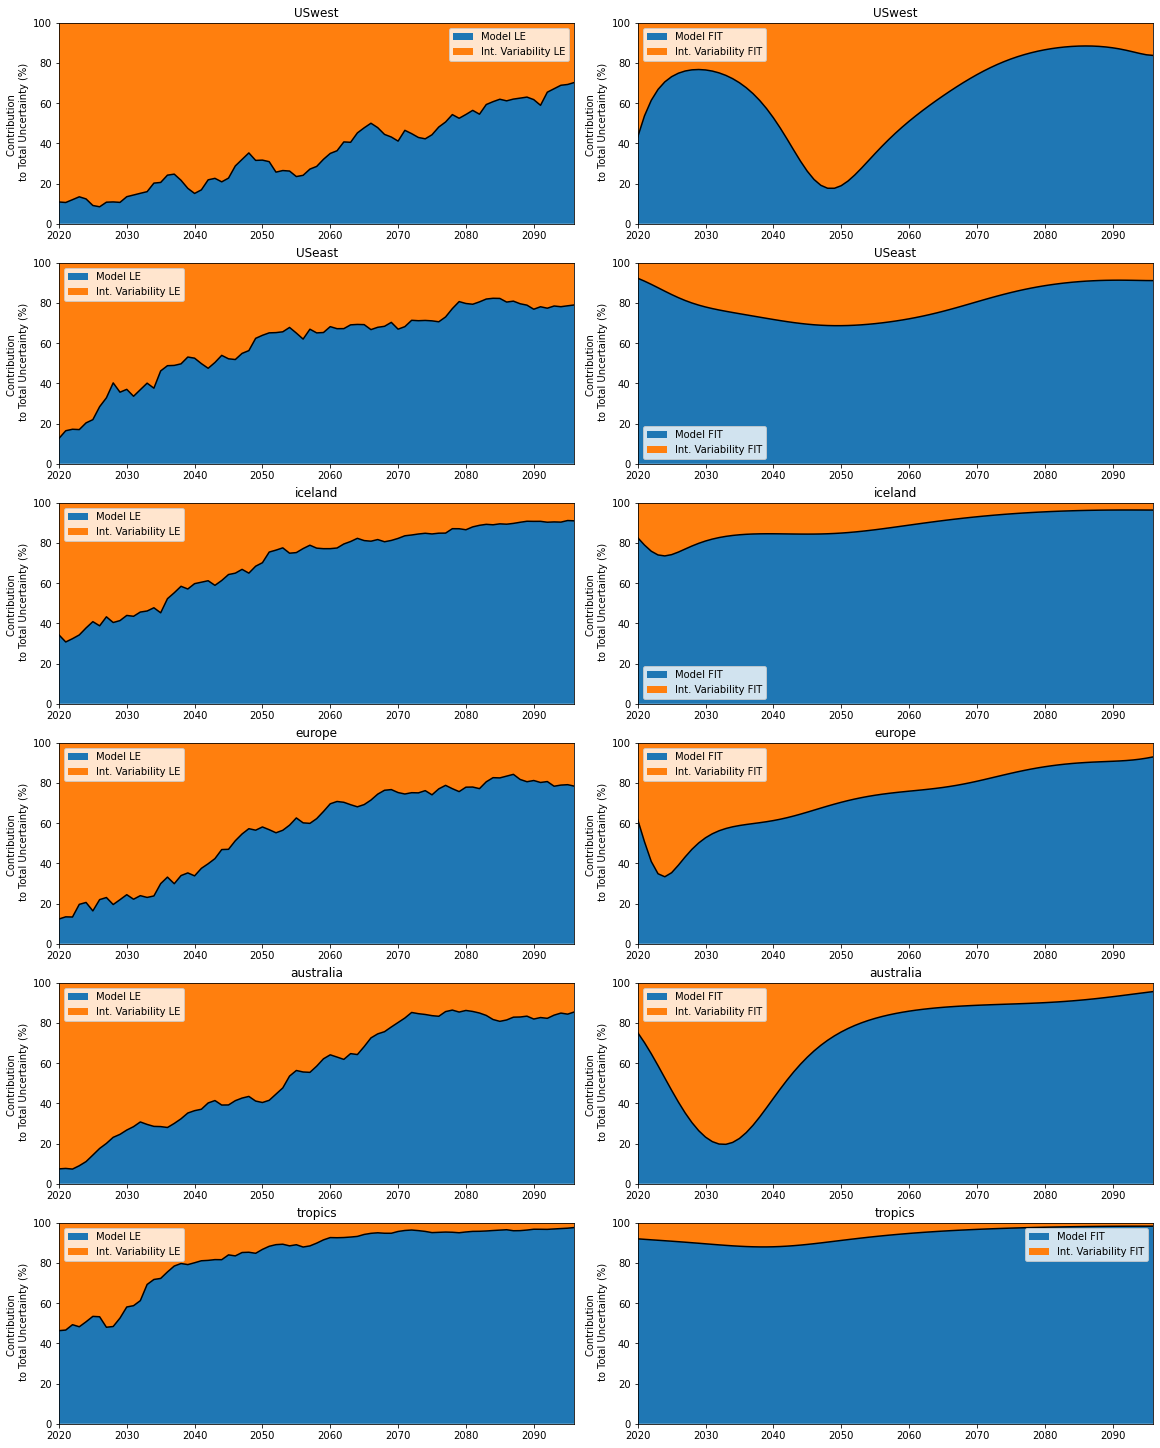

In [127]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

## TXx returns

In [128]:
regions = [USeast,USwest,iceland,europe,australia,tropics]
dss = []
return_period = 10
for r in regions:
    # empty dataset
    dataset = xr.Dataset()
    #reference data (max temp/pr)
    hist = r.hist[variable].sel(time=slice('1995','2014'))
    future = r.future[variable]
    hist = hist.resample(time='AS').max()
    future = future.resample(time='AS').max()
    
    
    # find number of expected events in period covered by x
    expected_events = len(np.unique(hist.time.dt.year)) / return_period
    q = 1 - expected_events / len(hist.time)
    
    quantile = hist.quantile(q, ('time','member'))
    
    
    occurance_hist = hist > quantile
    occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
    occurance_future = future > quantile
    occurance_future = occurance_future.where(np.isfinite(future), np.NaN)
    
    occurance = occurance_future.rolling(
        time=10, center=True).mean()
    dataset[r.variable+'_occurance'] = occurance 
    
    # Internal var via LE method 
    dataset['model_le'] = r.compute_modelLE(
        data=dataset[r.variable+'_occurance'])
    dataset['internal_le'] = r.compute_internalLE(
        data=dataset[r.variable+'_occurance'])
    dataset['total_le'] = r.compute_total_uncertainty(
        internal=dataset['internal_le'], model=dataset['model_le'])
    dataset['total_direct_le'] = r.compute_total_direct(
        data=dataset[r.variable+'_occurance'])
    dataset['internal_le_frac'], dataset['model_le_frac']= r.compute_percent_contribution(
        internal=dataset['internal_le'], model=dataset['model_le'], total=dataset['total_le'])

    # Internal var via FIT method
    dataset['fit'] = r.get_fit(data=dataset[r.variable+'_occurance'].T)
    dataset['internal_fit'] = r.compute_internalFIT(
        data=dataset[r.variable+'_occurance'].isel(member=0), fit=dataset['fit'])
    dataset['model_fit'] = r.compute_modelFIT(fit=dataset['fit'])
    dataset['total_fit'] = r.compute_total_uncertainty(
        internal=dataset['internal_fit'], model=dataset['model_fit'])
    dataset['internal_fit_frac'], dataset['model_fit_frac']= r.compute_percent_contribution(
        internal=dataset['internal_fit'], model=dataset['model_fit'], total=dataset['total_fit'])
    dataset['total_direct_fit'] = r.compute_totaldirect_fit(
        data=dataset[r.variable+'_occurance'].isel(member=0))
    dataset = dataset.expand_dims('region')
    dss.append(dataset)
# merge datasets to have region as dimension 
regions = ['USeast','USwest','iceland','europe','australia','tropics']
internal_max = xr.concat(dss,dim='region')
internal_max = internal_max.assign_coords({'region':regions})


In [129]:
internal_max

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/14)
    tas_occurance      (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le        (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    internal_le_frac   (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_fit       (region) float64 0.006624 0.01147 ... 0.006773 0.003954
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

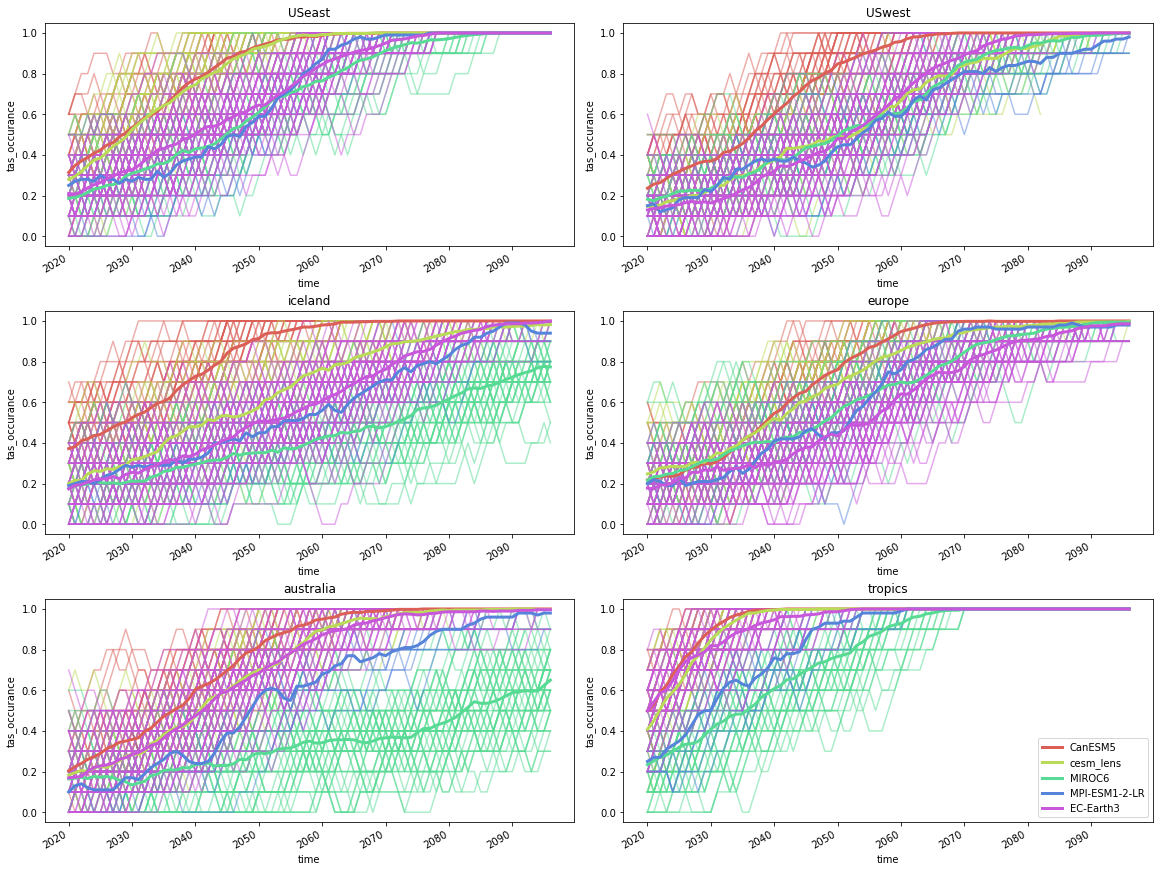

In [130]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal_max.model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_max.model):
        m = internal_max.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

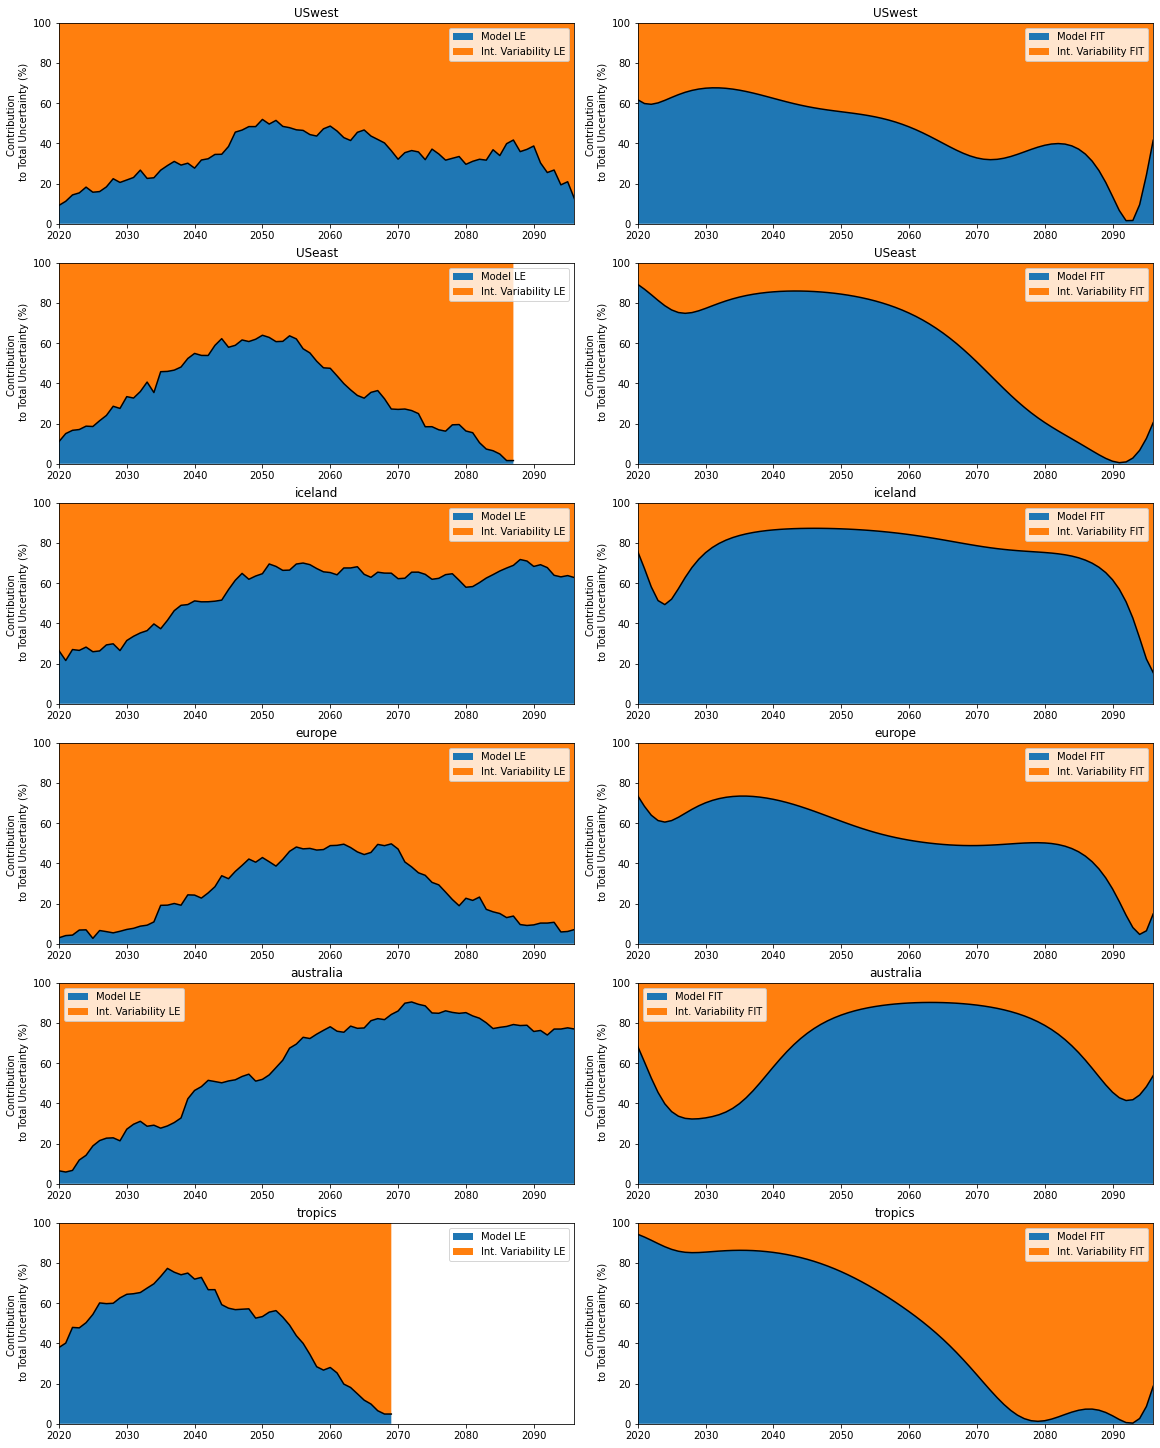

In [131]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_max.sel(region=region).time
    y=internal_max.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_max.sel(region=region).time,internal_max.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])